<a href="https://www.kaggle.com/code/dhanyathas/air-passenger-forecasting?scriptVersionId=285431283" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install prophet

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import warnings
import matplotlib.pyplot as plt

## Load the dataset.
#### The dataset contains the number of air passengers in the USA from January 1949 to December 1960. The frequency of the data is 1 month.

In [4]:
url = ("https://raw.githubusercontent.com/rahulhegde99"
      "/Time-Series-Analysis-and-Forecasting-of-Air-Passengers"
        "/master/airpassengers.csv")
data = pd.read_csv(url)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## What dataset Contains...
- The dataframe with the data should have a column saved as ds for time series data and y for the data to be forecasted. 
- Here, the time series is the column Month and the data to be forecasted is the column #Passengers.
- So, let's make a new DataFrame with new column names and the same data.
-  Also, ds should be in a DateTime format.

In [5]:
df = pd.DataFrame()
# create a new name for months column as ds and to passengers to y
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']
df.head()


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## Initializing a Prophet Model
- By using the Prophet() command we can initialize an instance of the fbprophet model for the training on our dataset
- and then help us to perform time series forecasting

In [6]:
model = Prophet()
model.fit(df)

12:58:09 - cmdstanpy - INFO - Chain [1] start processing
12:58:09 - cmdstanpy - INFO - Chain [1] done processing


## We want our model to predict the next 5 years

- that is, till 1965. The frequency of our data is 1 month and thus for 5 years,
- it is 12 * 5 = 60 months.
- So, we need to add 60 to more rows of monthly data to a dataframe.

In [7]:
future = model.make_future_dataframe(periods = 12 * 5, freq = 'M')

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


##### future dataframe we have just ds values, and we should predict the y values. 

In [8]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-07-31,723.462048,691.414500,753.378375,656.494695,650.084755,663.041326
200,1965-08-31,677.546676,647.863952,706.869423,659.622575,652.988438,666.366575
201,1965-09-30,640.328801,610.124248,668.820999,662.649556,655.750593,669.590524
202,1965-10-31,610.545100,581.143091,640.263933,665.777435,658.680052,672.873626
203,1965-11-30,640.167831,610.082389,670.153204,668.804416,661.471960,676.080995


## Forecast table contains
- Table ds, as we know, is the time series data. 
- **yhat** is the prediction,
- **yhat_lower**, and **yhat_upper** are the **uncertainty levels** (it basically means the prediction and actual values can vary within the bounds of the uncertainty levels).
- Next up we have a **trend** that shows the long-term growth, shrink, or stagnancy of the data,
- **trend_lower, and trend_upper** is the **uncertainty levels.**

## Plot 1

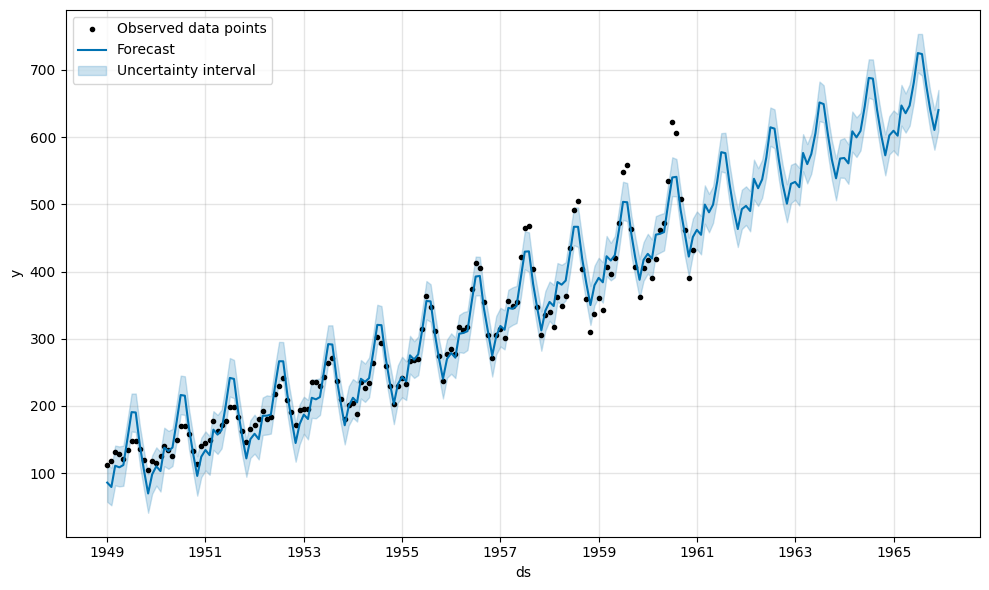

In [9]:
fig1 = model.plot(forecast, include_legend=True)

The above image shows the basic prediction. The **light blue** is the **uncertainty level(yhat_upper and yhat_lower)**, the **dark blue** is the **prediction(yhat)** and the **black dots** are the **original data**. We can see that the predicted data is very close to the actual data. 
*In the last five years*, there is no "actual" data, but looking at the performance of our model in years where data is available it is safe to say that the predictions are close to accurate.

## Plot 2

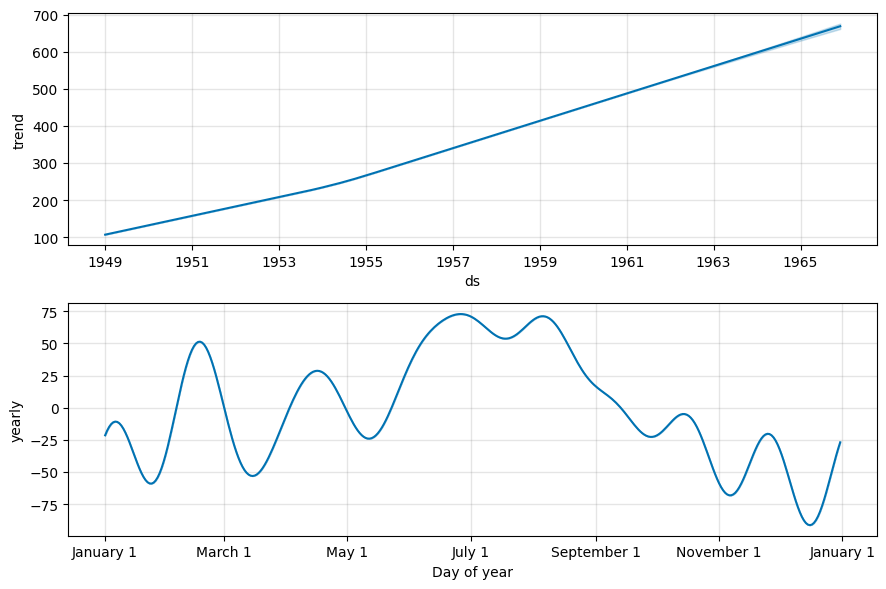

In [10]:
fig2 = model.plot_components(forecast)

he above images show the trends and seasonality (in a year) of the time series data. We can see there is an increasing trend, meaning the number of air passengers has increased over time.

## Plot 3

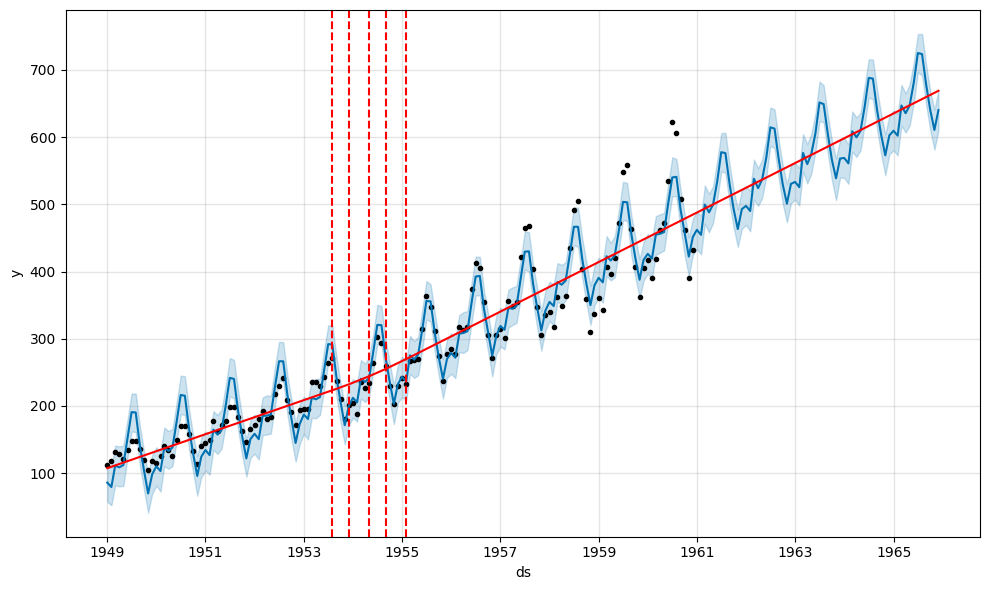

In [11]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),
                             model, forecast)

**Add changepoints** to indicate the **time in rapid trend growths**. The dotted red lines show the time when there was a rapid change in the trend of the passengers. Thus, we have seen how we can design a prediction model using Facebook Prophet